<a href="https://colab.research.google.com/github/kalehariprasad/bankchurn_prediction/blob/main/notebooks/bank_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

###Data reading

In [ ]:
df=pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
df.shape

(14222, 14)

In [ ]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14222 entries, 0 to 14221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14222 non-null  int64  
 1   CustomerId       14222 non-null  int64  
 2   Surname          14222 non-null  object 
 3   CreditScore      14222 non-null  int64  
 4   Geography        14222 non-null  object 
 5   Gender           14222 non-null  object 
 6   Age              14222 non-null  float64
 7   Tenure           14222 non-null  int64  
 8   Balance          14222 non-null  float64
 9   NumOfProducts    14222 non-null  int64  
 10  HasCrCard        14222 non-null  float64
 11  IsActiveMember   14222 non-null  float64
 12  EstimatedSalary  14222 non-null  float64
 13  Exited           14222 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.5+ MB


In [ ]:
df.drop(["id","CustomerId", "Surname"], axis = 1, inplace = True)

###Binning

In [ ]:
creditscore_bins = [0, 580, 670,740,800,851]
creditscore_labels = ['Poor', 'Fair', 'Good' , 'Very_Good' , 'Exceptional']

In [ ]:
df['Credit_group'] = pd.cut(df['CreditScore'], bins=creditscore_bins, labels=creditscore_labels, right=False)

In [ ]:
df['Credit_group'].value_counts()

Fair           5346
Good           4444
Poor           2411
Very_Good      1426
Exceptional     595
Name: Credit_group, dtype: int64

###Data Mining

In [ ]:
df["Age"] = df["Age"].astype(np.int64)
df["CreditScore"] = df["CreditScore"].astype(np.float64)
df["HasCrCard"] = df["HasCrCard"].astype(np.int64)
df["IsActiveMember"] = df["IsActiveMember"].astype(np.int64)
df['Credit_group']=df['Credit_group'].astype(object)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Credit_group
0,668.0,France,Male,33,3,0.00,2,1,0,181449.97,0,Fair
1,627.0,France,Male,33,1,0.00,2,1,1,49503.50,0,Fair
2,678.0,France,Male,40,10,0.00,2,1,0,184866.69,0,Good
3,581.0,France,Male,34,2,148882.54,1,1,1,84560.88,0,Fair
4,716.0,Spain,Male,33,5,0.00,2,1,1,15068.83,0,Good


In [ ]:
print(df.dtypes)

CreditScore        float64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Credit_group        object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14222 entries, 0 to 14221
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      14222 non-null  float64
 1   Geography        14222 non-null  object 
 2   Gender           14222 non-null  object 
 3   Age              14222 non-null  int64  
 4   Tenure           14222 non-null  int64  
 5   Balance          14222 non-null  float64
 6   NumOfProducts    14222 non-null  int64  
 7   HasCrCard        14222 non-null  int64  
 8   IsActiveMember   14222 non-null  int64  
 9   EstimatedSalary  14222 non-null  float64
 10  Exited           14222 non-null  int64  
 11  Credit_group     14222 non-null  object 
dtypes: float64(3), int64(6), object(3)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,14222.000000,14222.000000,14222.000000,14222.000000,14222.000000,14222.000000,14222.000000,14222.000000,14222.000000
mean,656.398256,37.991773,5.011391,55273.057464,1.552384,0.762129,0.499789,112965.117603,0.207355
std,80.749324,8.902499,2.816920,62759.893449,0.545933,0.425795,0.500018,50224.588673,0.405426
min,359.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74850.840000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,119079.405000,0.000000
75%,710.000000,42.000000,7.000000,119787.760000,2.000000,1.000000,1.000000,155786.327500,0.000000
max,850.000000,82.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Credit_group       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df.shape, df.columns)

(14222, 12) Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Credit_group'],
      dtype='object')


In [ ]:
categorical = df.select_dtypes("object").columns.values
numerical = np.setdiff1d(df.columns, categorical)
continuous = df.select_dtypes(float).columns.values
discrete = np.setdiff1d(numerical, continuous)

print(categorical, numerical, continuous, sep = "\n")

['Geography' 'Gender' 'Credit_group']
['Age' 'Balance' 'CreditScore' 'EstimatedSalary' 'Exited' 'HasCrCard'
 'IsActiveMember' 'NumOfProducts' 'Tenure']
['CreditScore' 'Balance' 'EstimatedSalary']


In [ ]:

# Corelation

cor = df.loc[:, continuous].corr()
cor

,CreditScore,Balance,EstimatedSalary
CreditScore,1.000000,-0.000437,0.000133
Balance,-0.000437,1.000000,-0.004050
EstimatedSalary,0.000133,-0.004050,1.000000


In [ ]:
# Mean salary grouped by gender

mean_salary_by_gender = df.groupby("Gender")["EstimatedSalary"].mean()
print(mean_salary_by_gender)

Gender
Female    112568.638974
Male      113274.007883
Name: EstimatedSalary, dtype: float64


In [ ]:
# Mean salary grouped by Credit_group
mean_salary_by_Credit_group = df.groupby("Credit_group")["EstimatedSalary"].mean()
print(mean_salary_by_Credit_group)

Credit_group
Exceptional    112767.151546
Fair           113707.366667
Good           113108.037982
Poor           111816.153534
Very_Good      111762.270842
Name: EstimatedSalary, dtype: float64


In [ ]:
# Median salary grouped by gender and geography

print(df.groupby(["Geography", "Gender"])["EstimatedSalary"].median())

Geography  Gender
France     Female    118974.82
           Male      120512.08
Germany    Female    116958.94
           Male      115600.87
Spain      Female    116951.10
           Male      120894.85
Name: EstimatedSalary, dtype: float64


In [ ]:
# Median salary grouped by gender and Credit_group

print(df.groupby(["Geography", "Credit_group"])["EstimatedSalary"].median())

Geography  Credit_group
France     Exceptional     120682.430
           Fair            120190.860
           Good            120512.080
           Poor            116977.895
           Very_Good       118024.100
Germany    Exceptional     116867.900
           Fair            116812.495
           Good            116944.400
           Poor            117929.240
           Very_Good       107840.050
Spain      Exceptional     115733.480
           Fair            123848.325
           Good            117837.450
           Poor            112678.375
           Very_Good       116912.450
Name: EstimatedSalary, dtype: float64


###Visualisation

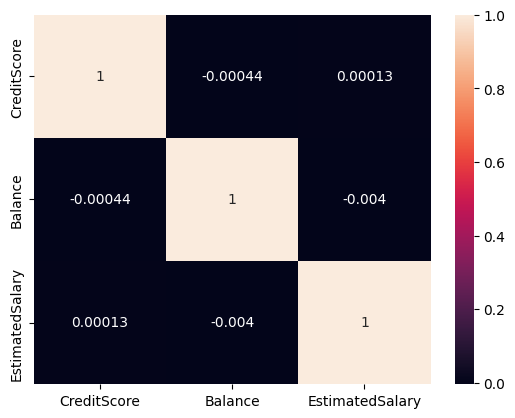

In [ ]:
sns.heatmap(cor, annot = True)
plt.show()

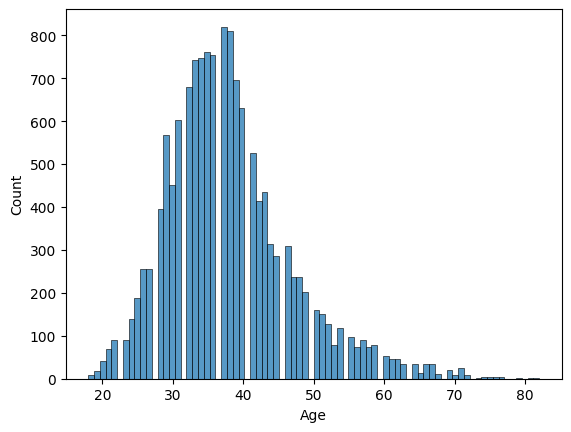

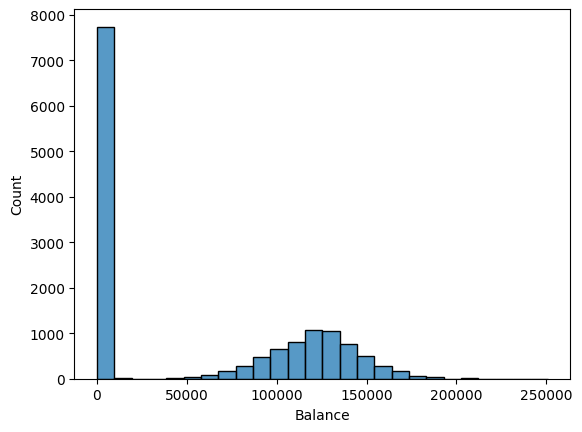

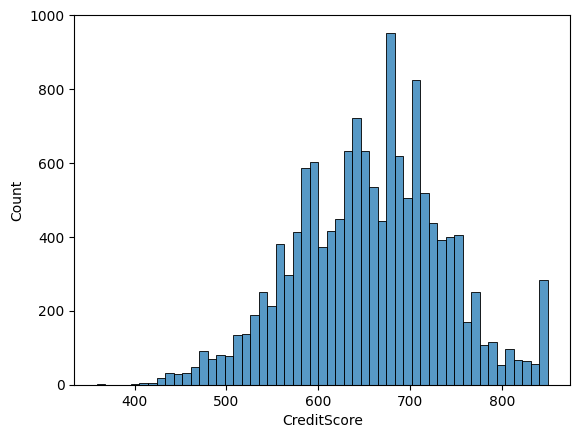

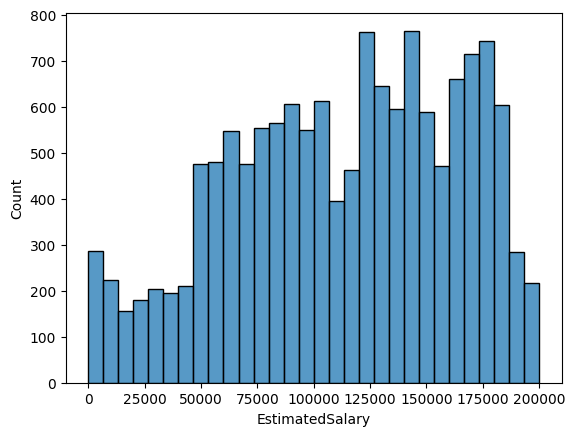

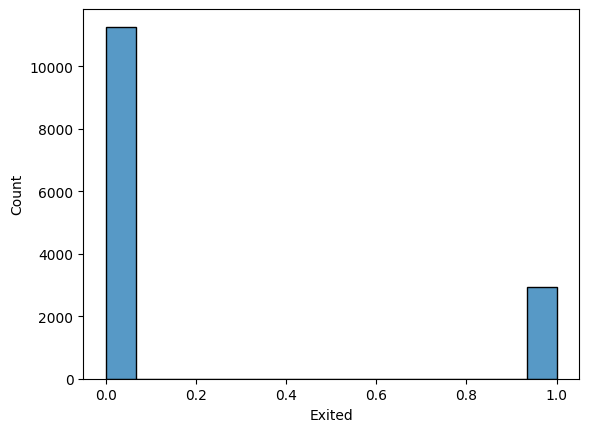

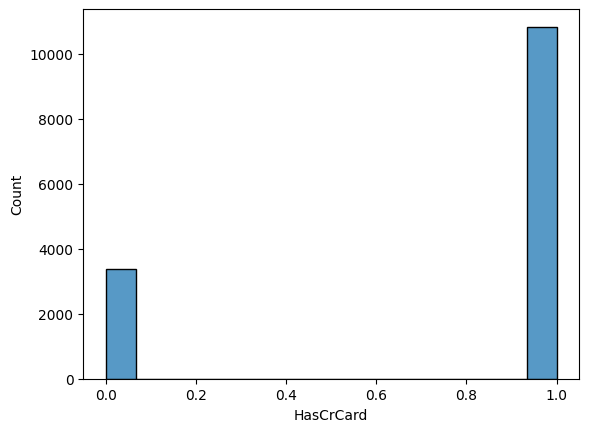

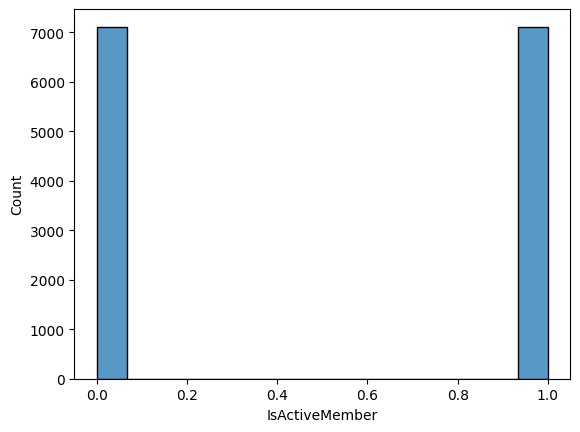

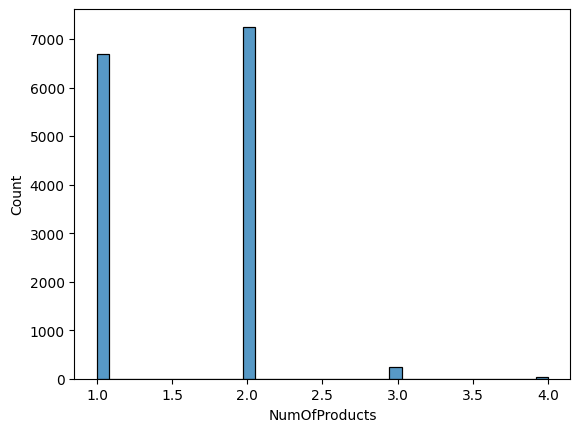

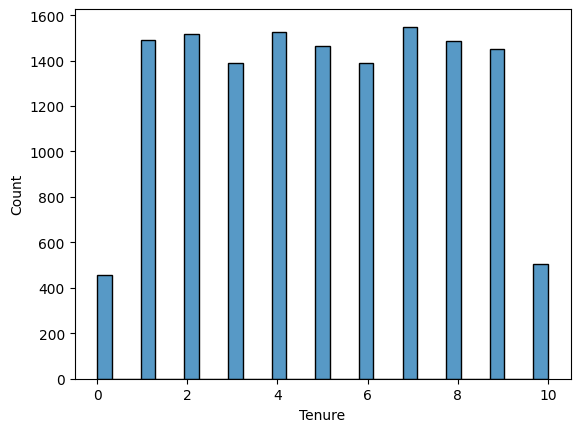

In [ ]:
# Histogram


for col in numerical:
    sns.histplot(x = col, data = df)
    plt.show()

value counts for Geography are
 France     8274
Spain      3050
Germany    2898
Name: Geography, dtype: int64



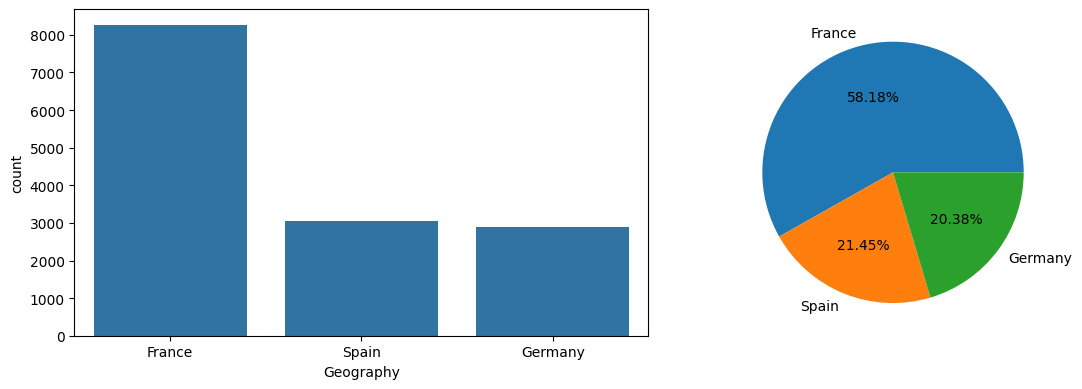

value counts for Gender are
 Male      7994
Female    6228
Name: Gender, dtype: int64



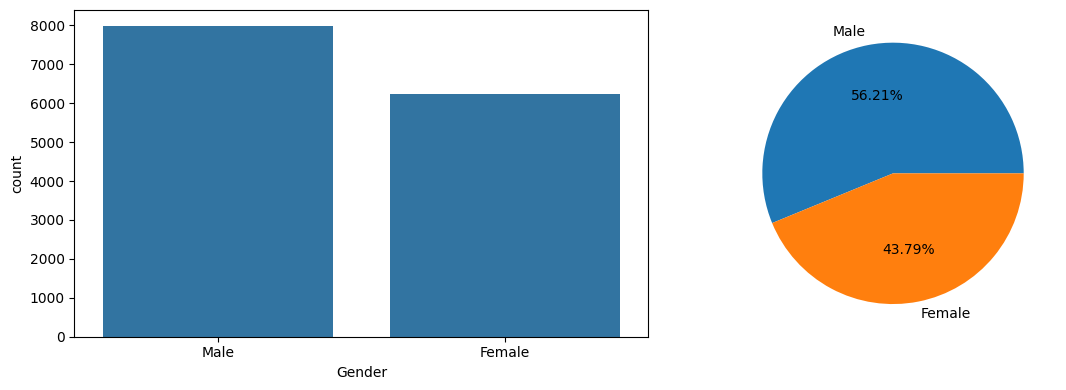

value counts for Credit_group are
 Fair           5346
Good           4444
Poor           2411
Very_Good      1426
Exceptional     595
Name: Credit_group, dtype: int64



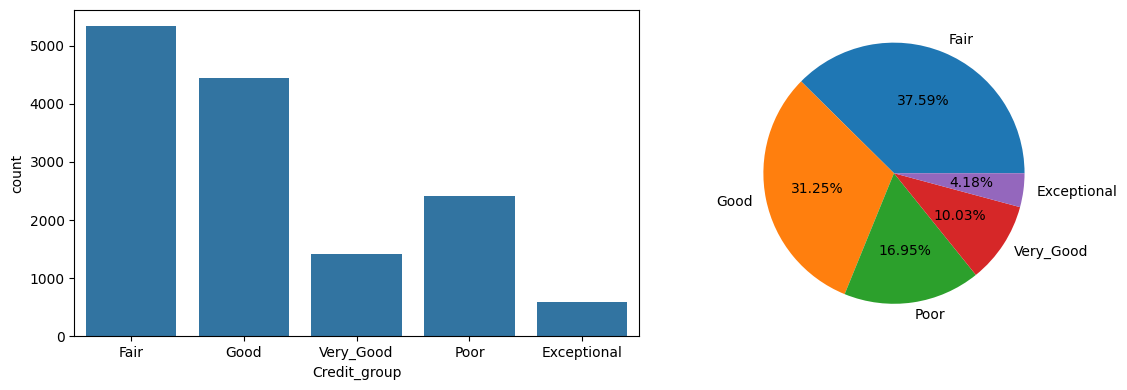

value counts for Age are
 37    820
38    809
35    762
36    754
34    748
     ... 
76      3
73      2
82      2
81      1
79      1
Name: Age, Length: 63, dtype: int64



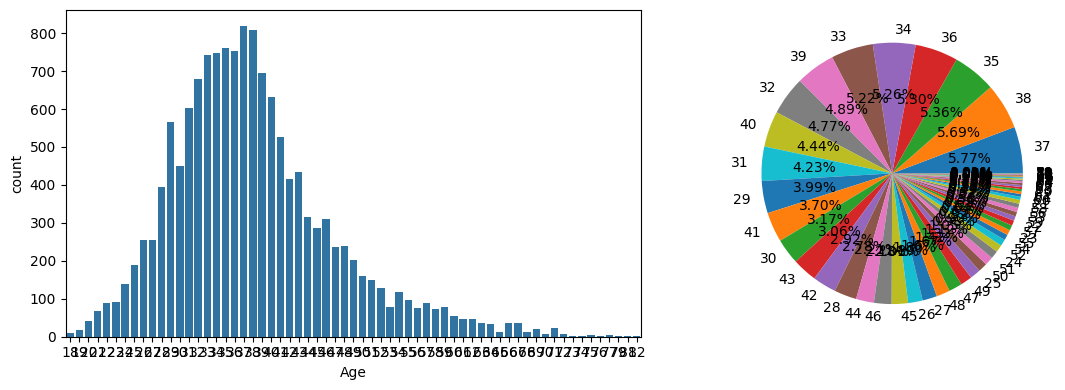

value counts for Exited are
 0    11273
1     2949
Name: Exited, dtype: int64



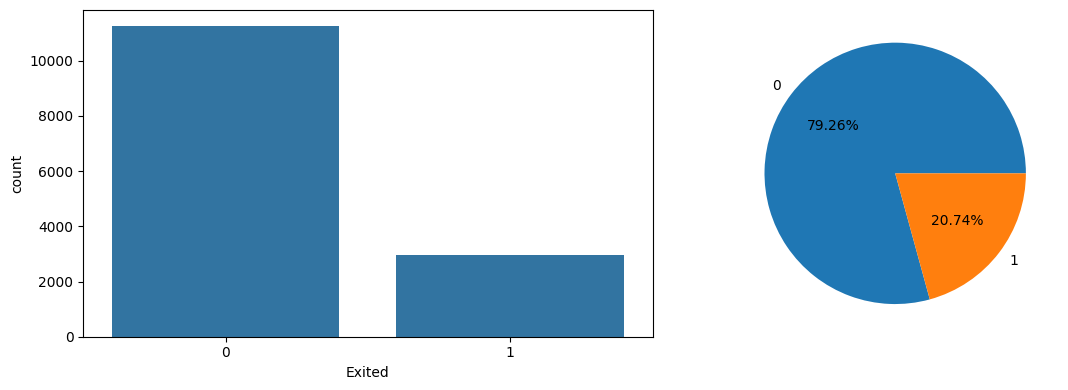

value counts for HasCrCard are
 1    10839
0     3383
Name: HasCrCard, dtype: int64



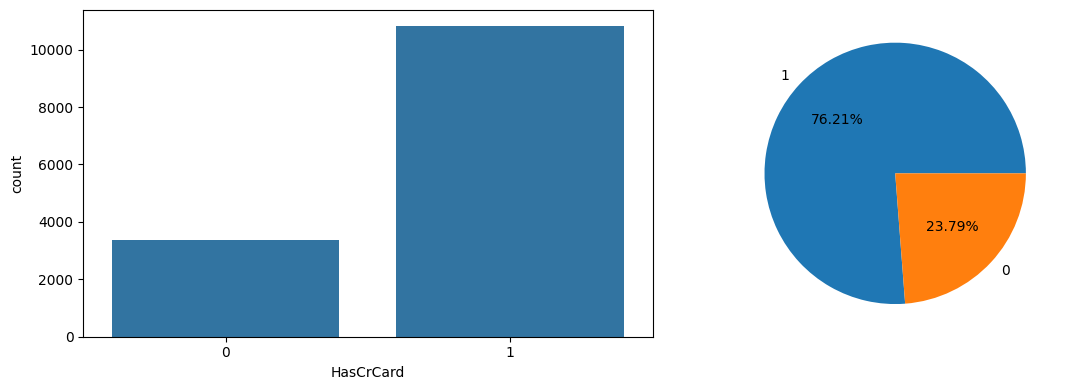

value counts for IsActiveMember are
 0    7114
1    7108
Name: IsActiveMember, dtype: int64



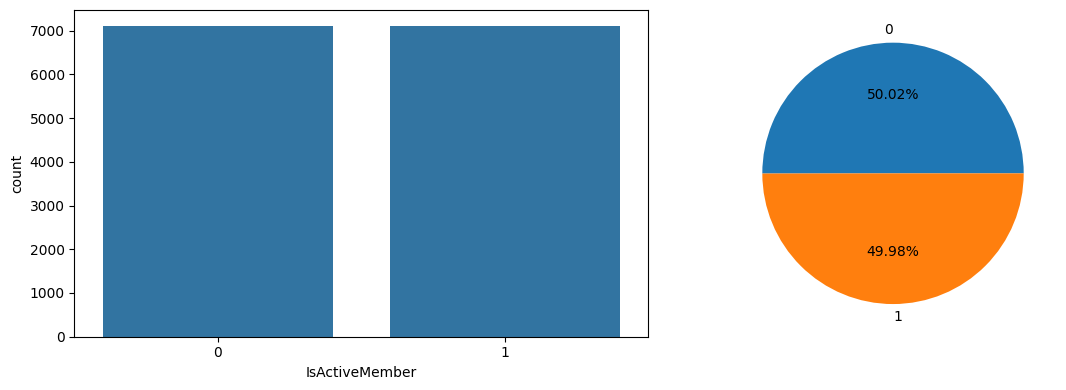

value counts for NumOfProducts are
 2    7254
1    6687
3     241
4      40
Name: NumOfProducts, dtype: int64



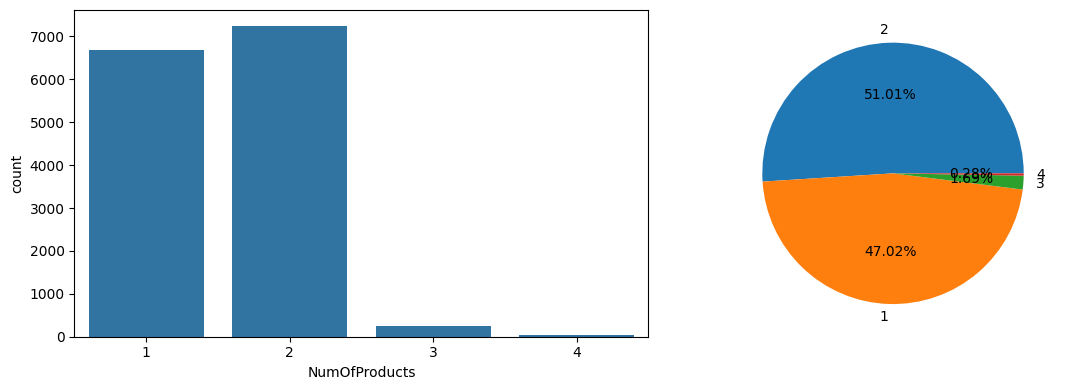

value counts for Tenure are
 7     1549
4     1524
2     1517
1     1492
8     1486
5     1462
9     1452
3     1389
6     1389
10     504
0      458
Name: Tenure, dtype: int64



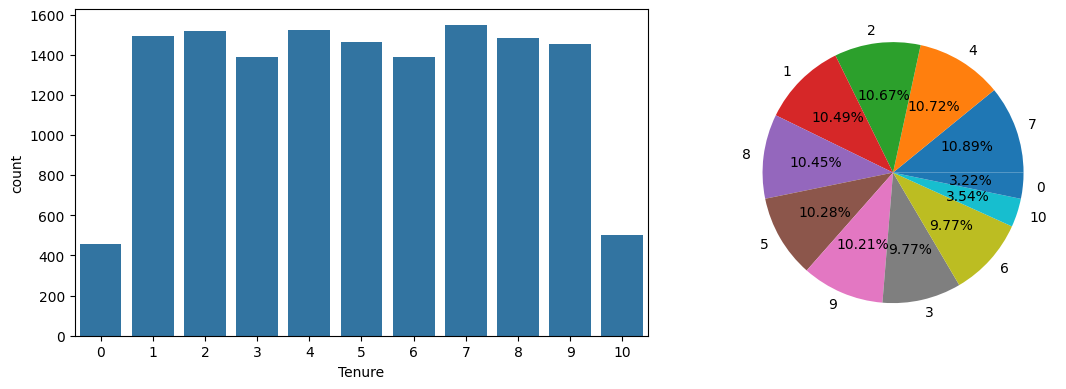

In [ ]:
# Count Plot and Pie Chart

for col in np.concatenate([categorical, discrete]):
    col_val_counts = df[col].value_counts()
    print('value counts for {} are\n {}'.format(col,col_val_counts),end = "\n\n")


    plt.figure(figsize = (12, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(x = col, data = df)

    plt.subplot(1, 2, 2)
    plt.pie(col_val_counts, labels = col_val_counts.keys(), autopct = "%.2f%%")
    plt.tight_layout()
    plt.show()


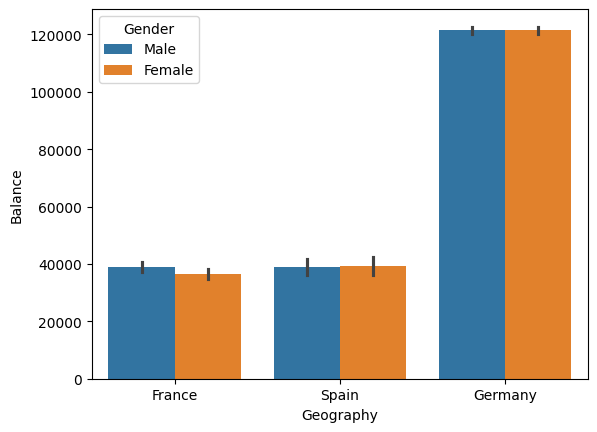

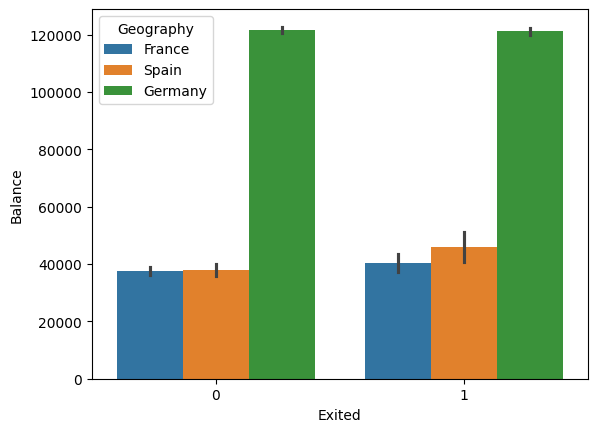

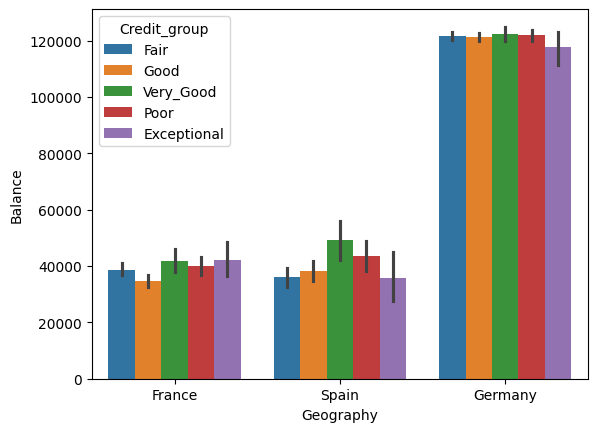

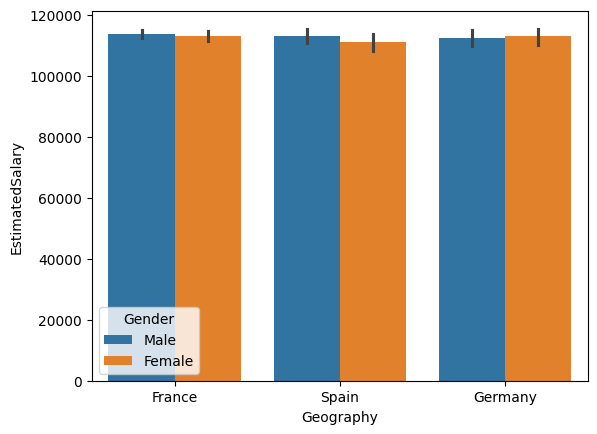

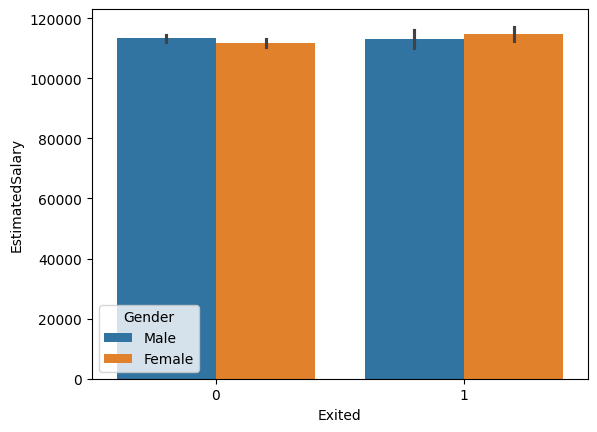

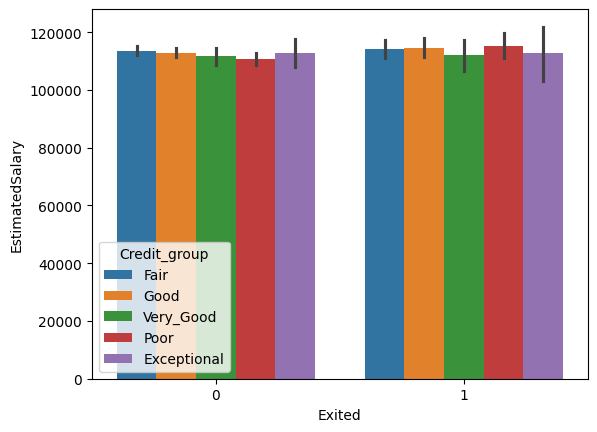

In [ ]:
# Bar Chart


sns.barplot(x = "Geography", y = "Balance", hue = "Gender", data = df)
plt.show()

sns.barplot(x = "Exited", y = "Balance", hue = "Geography", data = df)
plt.show()

sns.barplot(x = "Geography", y = "Balance", hue = "Credit_group", data = df)
plt.show()

sns.barplot(x = "Geography", y = "EstimatedSalary", hue = "Gender", data = df)
plt.show()

sns.barplot(x = "Exited", y = "EstimatedSalary", hue = "Gender", data = df)
plt.show()

sns.barplot(x = "Exited", y = "EstimatedSalary", hue = "Credit_group", data = df)
plt.show()

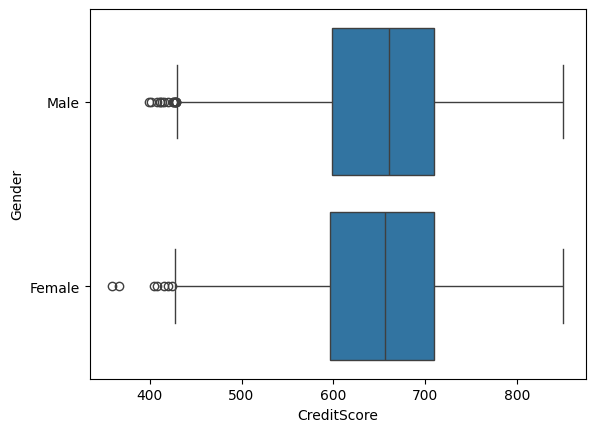

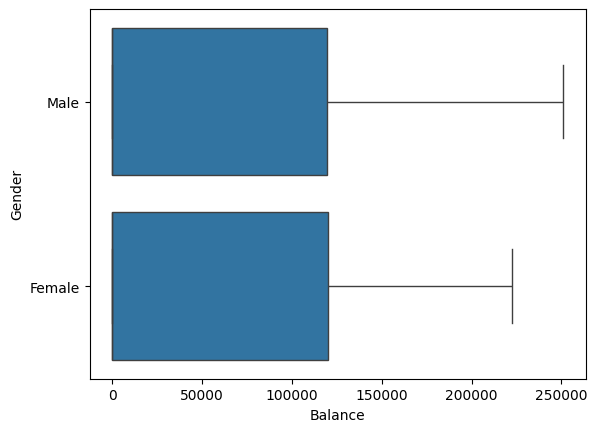

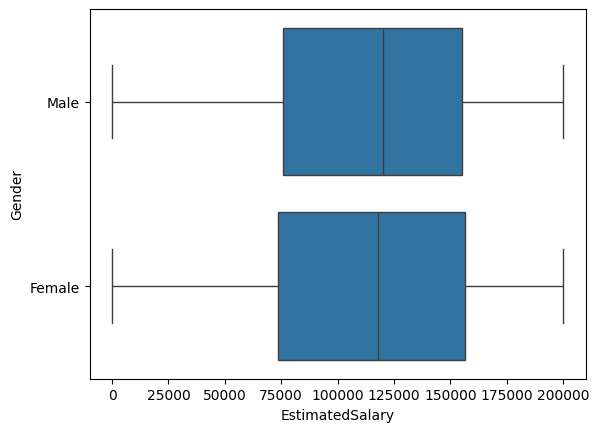

In [ ]:

for col in continuous:
    sns.boxplot(x = col, y = "Gender", data = df)
    plt.show()


Gender
Female    112568.638974
Male      113274.007883
Name: EstimatedSalary, dtype: float64


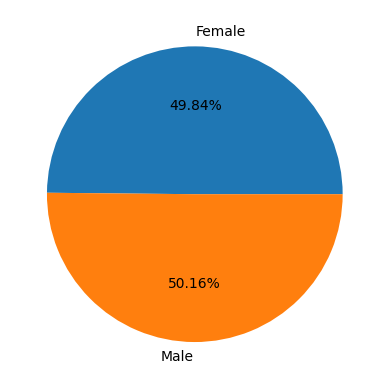

In [ ]:
# Mean salary grouped by gender
mean_salary_by_gender = df.groupby("Gender")["EstimatedSalary"].mean()
print(mean_salary_by_gender)
plt.pie(mean_salary_by_gender, labels =  mean_salary_by_gender.keys(), autopct = "%.2f%%")
plt.show()

Geography
France      37999.836374
Germany    121443.504117
Spain       39258.853167
Name: Balance, dtype: float64


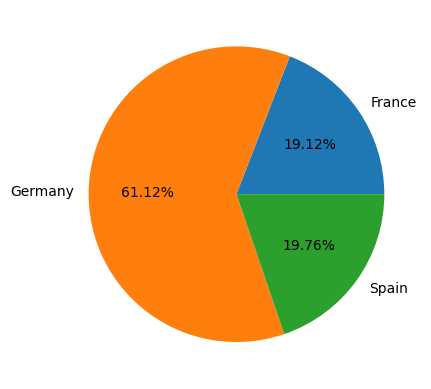

In [ ]:

# Median balance grouped by geography

median_balance_by_geography = df.groupby("Geography")["Balance"].mean()
print(median_balance_by_geography)
plt.pie(median_balance_by_geography, labels =  median_balance_by_geography.keys(), autopct = "%.2f%%")
plt.show()

Credit_group
Exceptional    112767.151546
Fair           113707.366667
Good           113108.037982
Poor           111816.153534
Very_Good      111762.270842
Name: EstimatedSalary, dtype: float64


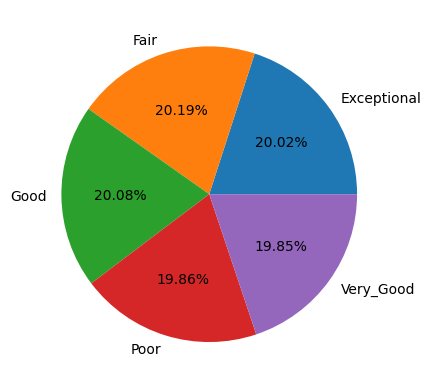

In [ ]:
#Median balance grouped by credit_group
median_salary_by_Credit_group = df.groupby("Credit_group")["EstimatedSalary"].mean()
print(median_salary_by_Credit_group)
plt.pie(median_salary_by_Credit_group, labels =  median_salary_by_Credit_group.keys(), autopct = "%.2f%%")
plt.show()

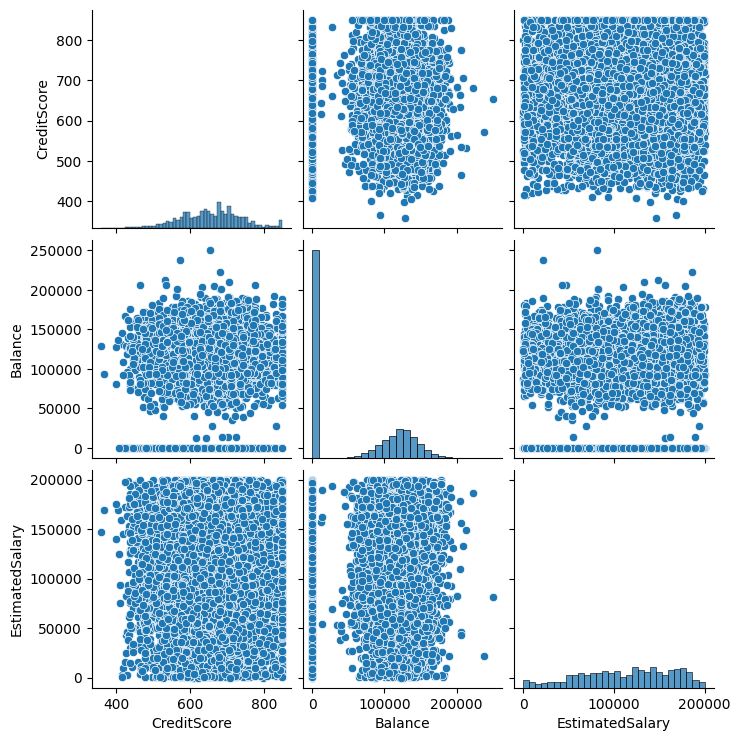

In [ ]:
sns.pairplot(df.loc[:, continuous])
plt.show()


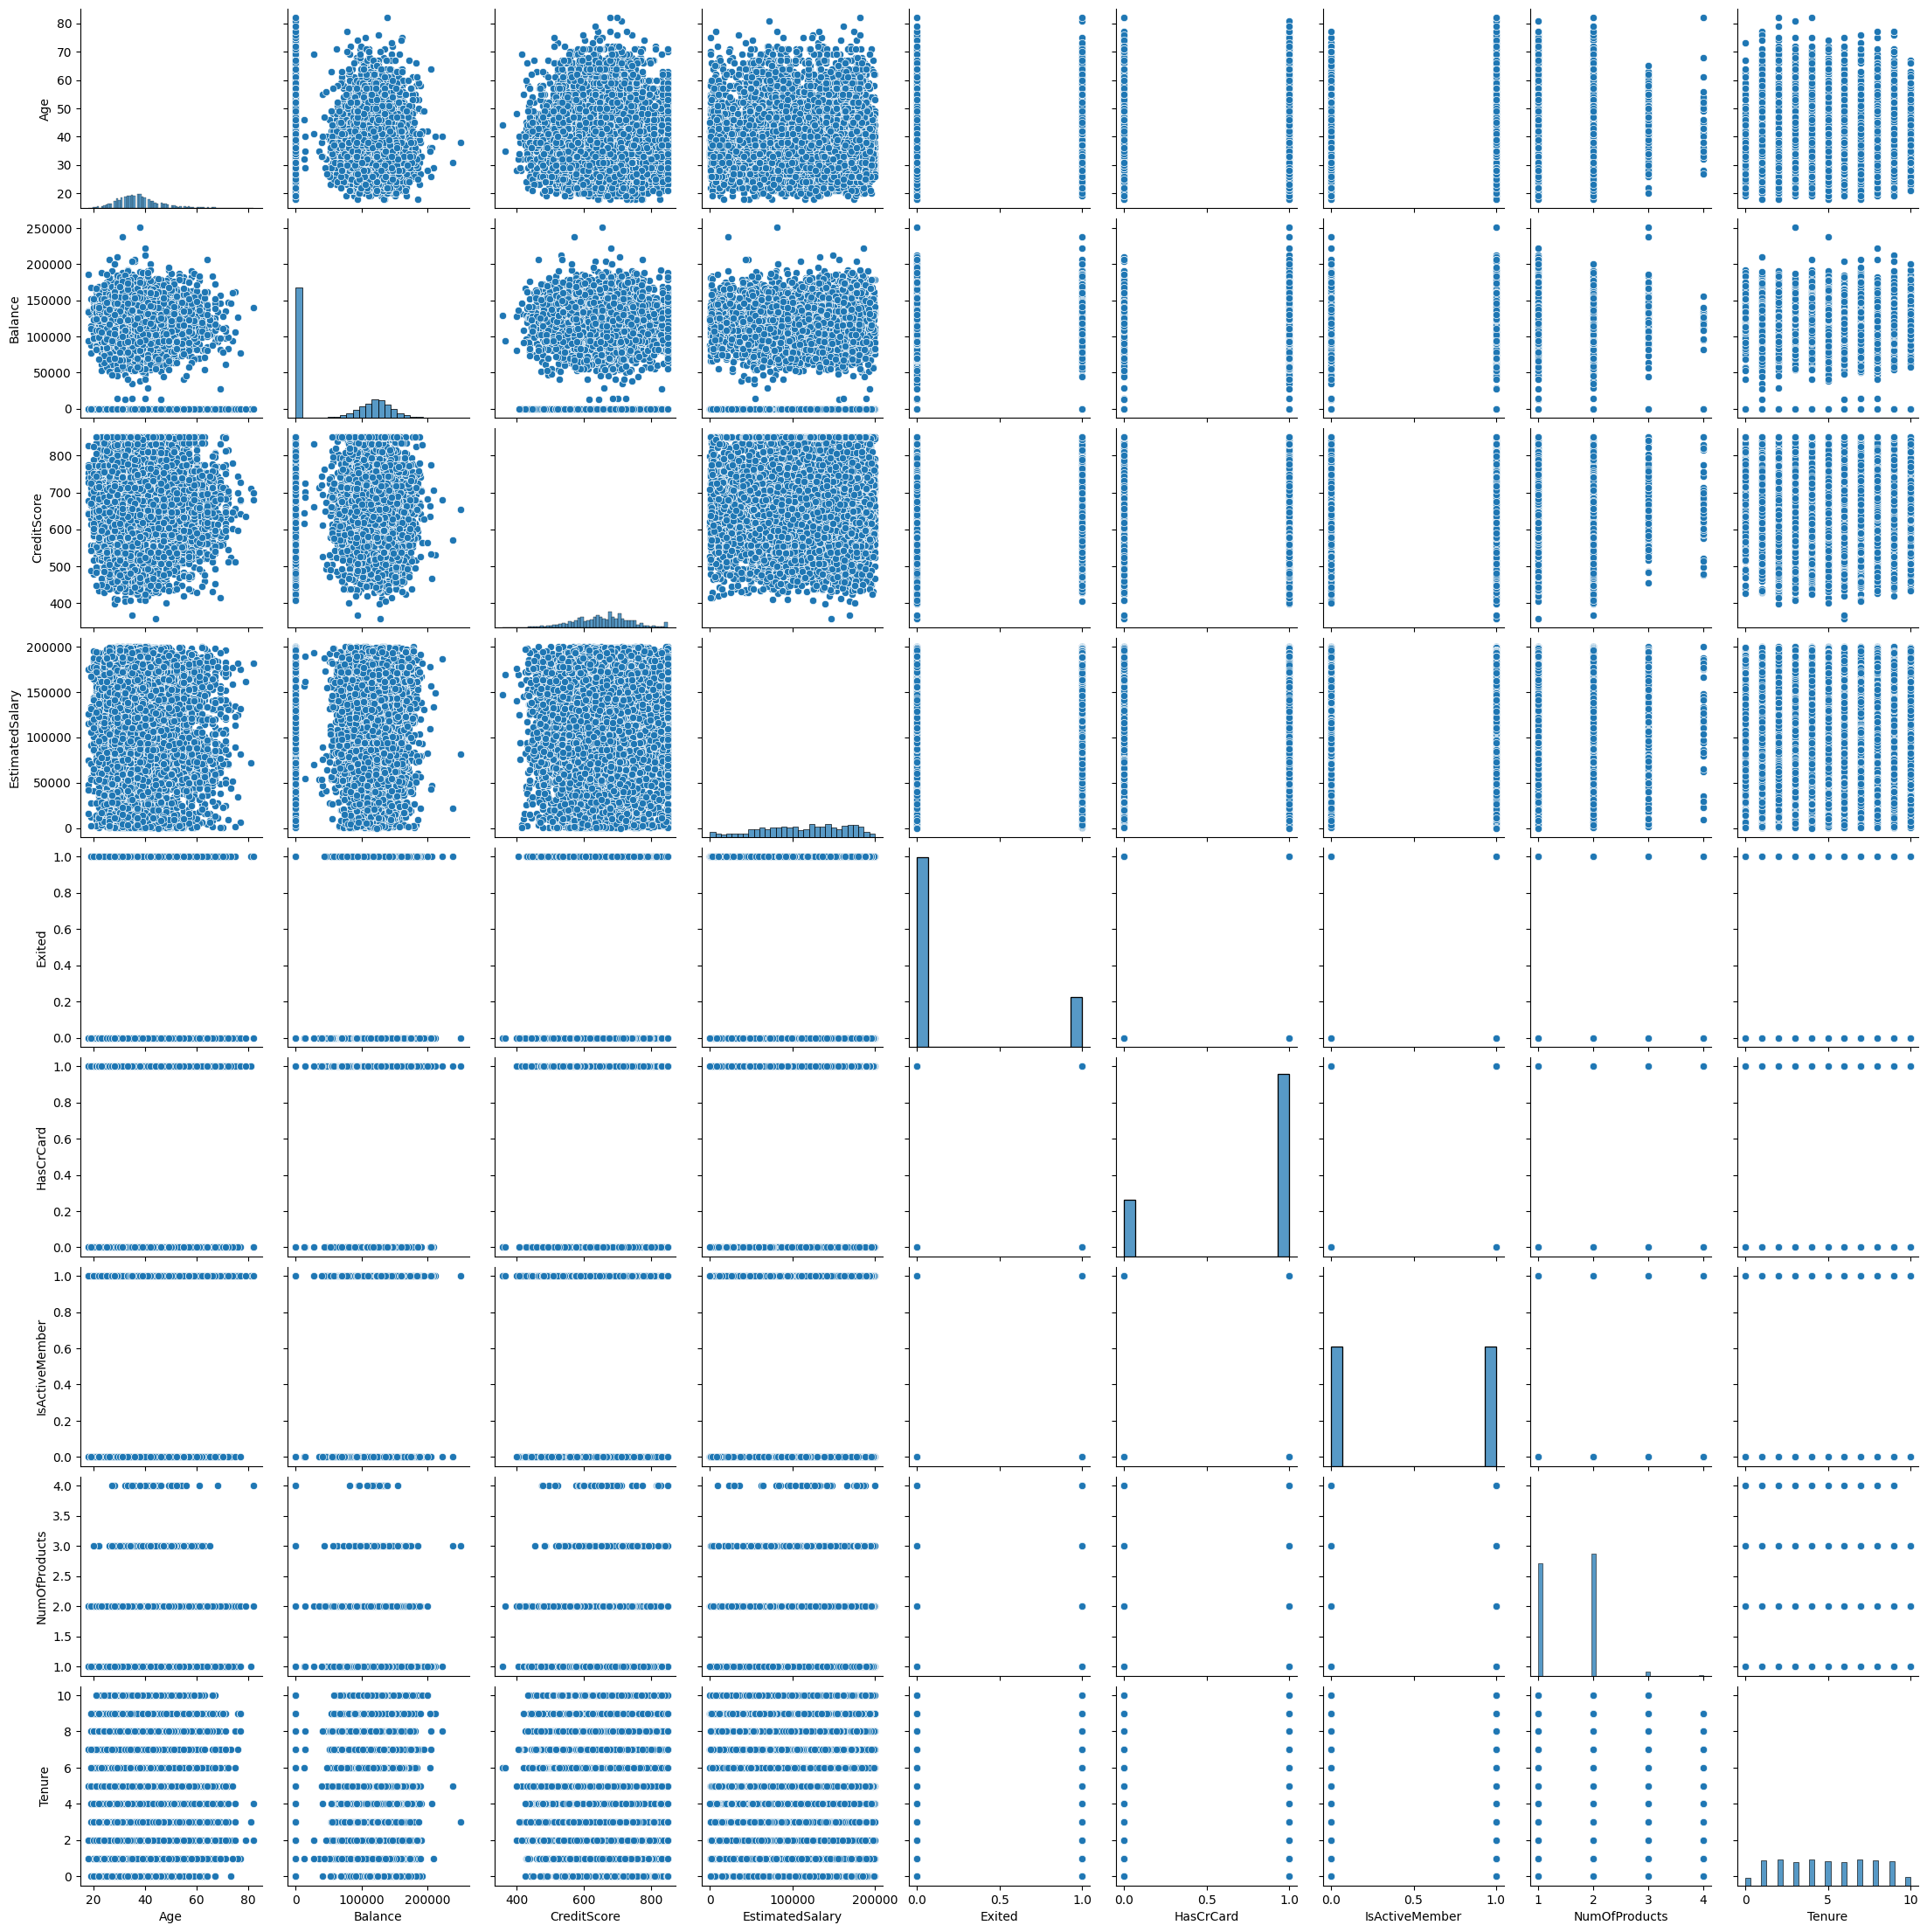

In [ ]:
sns.pairplot(df.loc[:, numerical])
plt.show()

In [ ]:
df['Exited'].value_counts()

0    11273
1     2949
Name: Exited, dtype: int64

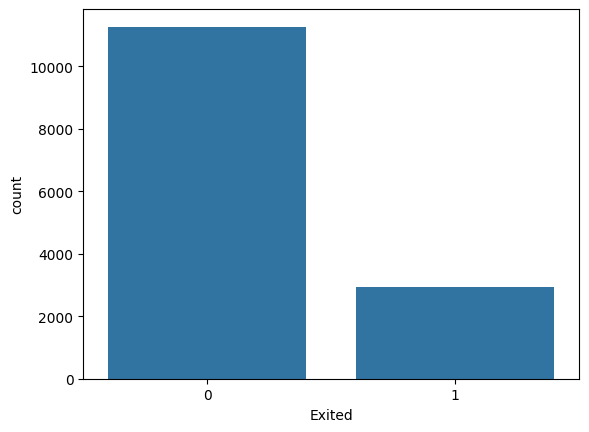

In [ ]:
sns.countplot(x='Exited',data=df)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14222 entries, 0 to 14221
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      14222 non-null  float64
 1   Geography        14222 non-null  object 
 2   Gender           14222 non-null  object 
 3   Age              14222 non-null  int64  
 4   Tenure           14222 non-null  int64  
 5   Balance          14222 non-null  float64
 6   NumOfProducts    14222 non-null  int64  
 7   HasCrCard        14222 non-null  int64  
 8   IsActiveMember   14222 non-null  int64  
 9   EstimatedSalary  14222 non-null  float64
 10  Exited           14222 non-null  int64  
 11  Credit_group     14222 non-null  object 
dtypes: float64(3), int64(6), object(3)
memory usage: 1.3+ MB


###Modeling

In [ ]:
x=df.drop(['CreditScore','Exited'],axis=1)
y=df['Exited']

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42)

In [ ]:
train_x.shape

(10666, 10)

In [ ]:
test_x.shape

(3556, 10)

In [ ]:
x.isnull().sum()

Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Credit_group       0
dtype: int64

In [ ]:
from math import remainder
categorical=ColumnTransformer(
    transformers=
          [
              ('onehot',OneHotEncoder(sparse_output=False,handle_unknown ='ignore'),[0,1])
           ],remainder ='passthrough'
          )
numerical=ColumnTransformer(
    transformers=
          [

              ('num',StandardScaler(),[2,3,4,5,6,7,8])
              ],remainder ='passthrough'
          )

categories = [['Poor', 'Fair', 'Good', 'Very_Good', 'Exceptional']]
ordinal = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1), [9])
    ]
)




In [ ]:
smt = SMOTE(random_state=42)
lg=LogisticRegression()

In [ ]:
pipeline = Pipeline([('onehot', categorical), ('num', numerical), ('odinal', ordinal),('smt',smt),('lg',lg)])

In [ ]:
models={'lg':LogisticRegression(),
        'svc':SVC(),
        'DT':DecisionTreeClassifier() ,
        'rf':RandomForestClassifier(),
        'xgboost': XGBClassifier()}

In [ ]:
pipeline

Pipeline(steps=[('onehot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1])])),
                ('num',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('odinal',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Poor',
                                                                              'Fair',
                                                                              'Good',
                                                                              'Very_Good',
                                                                              'Exceptional']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [9])])),
                ('smt', SMOTE(random_state=42)), ('lg', LogisticRegression())])

In [ ]:
pipeline.fit(train_x,train_y)

Pipeline(steps=[('onehot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1])])),
                ('num',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('odinal',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Poor',
                                                                              'Fair',
                                                                              'Good',
                                                                              'Very_Good',
                                                                              'Exceptional']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [9])])),
                ('smt', SMOTE(random_state=42)), ('lg', LogisticRegression())])

In [ ]:
pre=pipeline.predict(test_x)
from sklearn.metrics import classification_report


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# Assuming 'test_y' contains the ground truth labels and 'pre' contains the predicted labels
print(classification_report(test_y, pre))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2861
           1       0.00      0.00      0.00       695

    accuracy                           0.80      3556
   macro avg       0.40      0.50      0.45      3556
weighted avg       0.65      0.80      0.72      3556



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(test_y, pre))

[[2861    0]
 [ 695    0]]


In [ ]:
for name, model in models.items():
    pipe = Pipeline([
        ('onehot', categorical),
        ('num', numerical),
        ('ordinal', ordinal),
        ('smt', smt),
        ('model', model)
    ])
    pipe.fit(train_x, train_y)
    pre = pipe.predict(test_x)
    print(f'metrics for {model}')
    print(confusion_matrix(test_y, pre))
    print(accuracy_score(test_y, pre))
    print(classification_report(test_y, pre))

    print("************************************")

metrics for LogisticRegression()
[[2861    0]
 [ 695    0]]
0.8045556805399325
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2861
           1       0.00      0.00      0.00       695

    accuracy                           0.80      3556
   macro avg       0.40      0.50      0.45      3556
weighted avg       0.65      0.80      0.72      3556

************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


metrics for SVC()
[[   0 2861]
 [   0  695]]
0.1954443194600675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2861
           1       0.20      1.00      0.33       695

    accuracy                           0.20      3556
   macro avg       0.10      0.50      0.16      3556
weighted avg       0.04      0.20      0.06      3556

************************************
metrics for DecisionTreeClassifier()
[[2861    0]
 [ 695    0]]
0.8045556805399325
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2861
           1       0.00      0.00      0.00       695

    accuracy                           0.80      3556
   macro avg       0.40      0.50      0.45      3556
weighted avg       0.65      0.80      0.72      3556

************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

metrics for RandomForestClassifier()
[[   0 2861]
 [   0  695]]
0.1954443194600675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2861
           1       0.20      1.00      0.33       695

    accuracy                           0.20      3556
   macro avg       0.10      0.50      0.16      3556
weighted avg       0.04      0.20      0.06      3556

************************************
metrics for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_le

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif